In [1]:
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd 
import pathlib

In [2]:
from source_copy import main


df = pd.DataFrame(columns=["split", "seed", "metric", "value"], dtype=object)

src_path = "/home/t-eliass/resources/data/smcalflow.agent.data/test_valid.src_tok"
gold_path = "/home/t-eliass/resources/data/smcalflow.agent.data/test_valid.tgt"
for seed in [12, 31, 64]: 
    for split in [5000, 10000, 20000, 50000, 100000, "max"]:
        pred_path = f"/home/t-eliass/amlt_models/transformer/FindManager_{seed}_seed/{split}_100/translate_output/test_valid.tgt" 

        local_df = main(src_path, pred_path, gold_path)
        mean_prec = local_df[local_df['metric'] == 'precision'].mean() 
        mean_rec = local_df[local_df['metric'] == 'recall'].mean() 
        mean_f1 = local_df[local_df['metric'] == 'f1'].mean() 

        df = df.append({"seed": seed, "split": str(split), "metric": "precision", "value": mean_rec}, ignore_index=True)
        df = df.append({"seed": seed, "split": str(split), "metric": "recall", "value": mean_prec}, ignore_index=True)
        df = df.append({"seed": seed, "split": str(split), "metric": "f1", "value": mean_f1}, ignore_index=True)



df.to_csv("/home/t-elias/scratch/FindManager_source_copy_analysis.csv")

6614it [00:51, 127.45it/s]


Precision: value    0.42608
dtype: float64
Recall: value    0.417659
dtype: float64
F1: value    0.418574
dtype: float64


6614it [00:51, 127.60it/s]


Precision: value    0.442838
dtype: float64
Recall: value    0.435409
dtype: float64
F1: value    0.436425
dtype: float64


6614it [00:52, 127.16it/s]


Precision: value    0.455831
dtype: float64
Recall: value    0.450368
dtype: float64
F1: value    0.450644
dtype: float64


6614it [00:51, 127.91it/s]


Precision: value    0.466125
dtype: float64
Recall: value    0.464365
dtype: float64
F1: value    0.463759
dtype: float64


6614it [00:52, 126.41it/s]


Precision: value    0.468111
dtype: float64
Recall: value    0.467306
dtype: float64
F1: value    0.466517
dtype: float64


6614it [00:52, 125.21it/s]


Precision: value    0.469023
dtype: float64
Recall: value    0.467538
dtype: float64
F1: value    0.467038
dtype: float64


6614it [00:52, 126.03it/s]


Precision: value    0.420743
dtype: float64
Recall: value    0.411436
dtype: float64
F1: value    0.412636
dtype: float64


6614it [00:52, 125.74it/s]


Precision: value    0.441645
dtype: float64
Recall: value    0.433911
dtype: float64
F1: value    0.435072
dtype: float64


6614it [00:52, 125.49it/s]


Precision: value    0.452976
dtype: float64
Recall: value    0.446208
dtype: float64
F1: value    0.447131
dtype: float64


6614it [00:52, 126.17it/s]


Precision: value    0.463469
dtype: float64
Recall: value    0.461958
dtype: float64
F1: value    0.461265
dtype: float64


6614it [00:52, 126.72it/s]


Precision: value    0.469824
dtype: float64
Recall: value    0.469797
dtype: float64
F1: value    0.468557
dtype: float64


6614it [00:52, 126.26it/s]


Precision: value    0.469716
dtype: float64
Recall: value    0.469014
dtype: float64
F1: value    0.468189
dtype: float64


6614it [00:52, 126.57it/s]


Precision: value    0.432409
dtype: float64
Recall: value    0.421416
dtype: float64
F1: value    0.423457
dtype: float64


6614it [00:51, 127.33it/s]


Precision: value    0.448135
dtype: float64
Recall: value    0.442009
dtype: float64
F1: value    0.442403
dtype: float64


6614it [00:51, 127.79it/s]


Precision: value    0.459203
dtype: float64
Recall: value    0.455648
dtype: float64
F1: value    0.455427
dtype: float64


6614it [00:51, 127.63it/s]


Precision: value    0.462368
dtype: float64
Recall: value    0.461159
dtype: float64
F1: value    0.460373
dtype: float64


6614it [00:51, 127.36it/s]


Precision: value    0.469242
dtype: float64
Recall: value    0.469068
dtype: float64
F1: value    0.467884
dtype: float64


6614it [00:52, 126.85it/s]


Precision: value    0.472038
dtype: float64
Recall: value    0.471891
dtype: float64
F1: value    0.4707
dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: '/home/t-elias/scratch/FindManager_source_copy_analysis.csv'

In [3]:
df.to_csv("/home/t-eliass/scratch/FindManager_source_copy_analysis.csv")


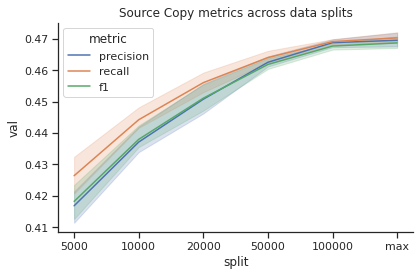

In [26]:

new_df = df.copy()
new_df['val'] = [x['value'] for x in df['value']]
fig, ax = plt.subplots(1,1)
sns.set_theme(style="ticks")
sns.lineplot(data=new_df, x="split", y="val", hue="metric")
sns.despine()

ax.set_title("Source Copy metrics across data splits")
plt.tight_layout() 
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/FindManager_source_copy.pdf")